In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Replace String with integers
data.replace(('yes', 'no'), (1, 0), inplace=True)
data.replace(('furnished', 'unfurnished', 'semi-furnished'), (1, 0, 0), inplace=True)

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [ ]:
# Shape of data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (545, 13)


In [ ]:
y = data['price']
X = data.drop('price', axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (436, 12)
X_test: (109, 12)
Y_train: (436,)
Y_test: (109,)


In [ ]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=linreg.predict(x_test)
y_pred

array([ 3925312.3440387 ,  6216699.12481156,  4295354.02909086,
        7279589.87900726,  3026232.75550031,  7018316.74742096,
        3425000.04640006,  3075373.83792412,  3665527.8562098 ,
        8330194.04800682,  6827162.8282959 ,  3679347.43912158,
        3633109.61241797,  4542577.31196847,  3848085.51493654,
        2138168.21745234,  3863191.78489851,  3508242.98428507,
        3091283.60230098,  4583124.39877747,  5828592.44230284,
        6621324.66199911,  4548443.11148017,  2836963.36857589,
        5528645.55846029,  5682978.8264571 ,  5282287.41463079,
        5368677.0816866 ,  5627561.87314901,  5795089.48438932,
        3189273.50816856,  6215460.10960168,  7351782.15864421,
        3097245.86853348,  4323703.43358708,  5050135.73559873,
        4897035.99246479,  3527277.82683763,  2834753.47096079,
        4133381.11375937,  8061793.172464  ,  5199777.00909286,
        6635451.65244898,  3722825.6720999 ,  4043897.23587568,
        6253526.05900112,  4660113.92730

In [ ]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 65.87


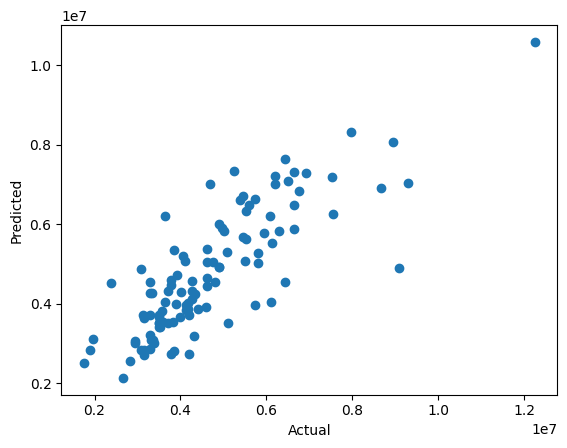

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

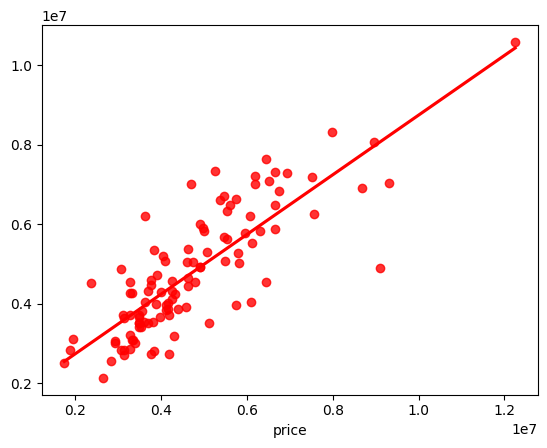

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');